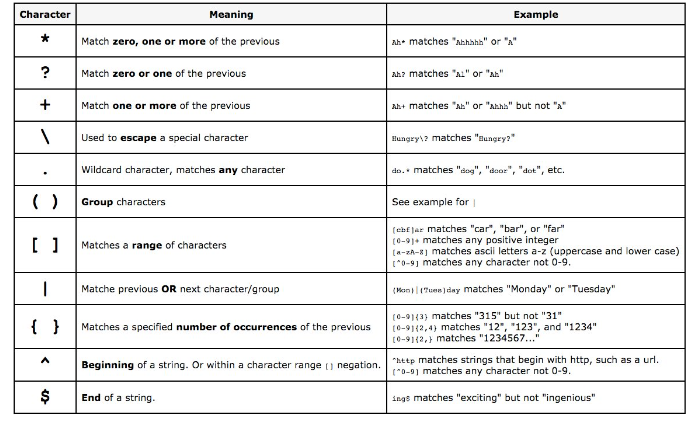

Pattern 1: Matching Phone Numbers

In [1]:
import re

text = """
Alice: 555-123-4567
Bob: 333-987-6543
Charlie: 777-555-88
"""
pattern = r'\d{3}-\d{3}-\d{4}'
matches = re.findall(pattern, text)
print("Pattern 1 Matches:", matches)

Pattern 1 Matches: ['555-123-4567', '333-987-6543']


1. \d: Matches any digit (equivalent to [0-9]).
2. {3}: Specifies that the preceding element (digit) should occur exactly 3 times.
3. -: Matches the hyphen character literally.
4. Combining these, \d{3}-\d{3}-\d{4} matches phone numbers in the format XXX-XXX-XXXX.

Pattern 2: Matching Names with Phone Numbers
Pattern:

In [2]:
text = """
Alice: 555-123-4567
Bob: 333-987-6543
Charlie: 777-555-88
"""
pattern = r'([A-Za-z]+):\s(\d{3}-\d{3}-\d{4})'
matches = re.findall(pattern, text)
print('Pattern 2 Matches: \n')
for match in matches:
    print("Name:", match[0], "\tPhone:", match[1])

Pattern 2 Matches: 

Name: Alice 	Phone: 555-123-4567
Name: Bob 	Phone: 333-987-6543


1. ([A-Za-z]+): Capturing group for matching names composed of alphabetic characters.
2. :\s: Matches a colon followed by a space character.
3. (\d{3}-\d{3}-\d{4}): Capturing group for matching phone numbers.

Pattern 3: Matching Email Addresses ↑¶


In [3]:
pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
emails = """
Emails: john.doe@example.com, jane_smith@gmail.com, info@company.net
"""
matches = re.findall(pattern, emails, re.IGNORECASE)
print("Pattern 3 Matches:", matches)

Pattern 3 Matches: ['john.doe@example.com', 'jane_smith@gmail.com', 'info@company.net']


In [4]:
pattern = r'\b([A-Za-z0-9._]+)@\b'
emails = """
john.doe@example.com, jane_smith@gmail.com, info@company.net
"""
matches = re.findall(pattern, emails, re.IGNORECASE)
print("Pattern 3 Matches:", matches)

Pattern 3 Matches: ['john.doe', 'jane_smith', 'info']


Let's break down the regular expression pattern r'\b@([A-Za-z0-9._]+)\b' step by step:

\b: Word Boundary - \b is a word boundary anchor. It matches the position between a word character (such as letters or digits) and a non-word character (such as spaces, punctuation, or the start/end of a line). It's used to ensure that the pattern matches whole words.

@: Literal '@' Symbol - The @ character matches the "@" symbol exactly.

([A-Za-z0-9._]+): Capturing Group for Email Username - ( and ) define a capturing group. This capturing group is used to capture the email username part and [A-Za-z0-9._]+ matches one or more occurrences of characters that are valid in an email username. This includes alphabetic characters (both uppercase and lowercase), digits, dots, and underscores.

\b: Word Boundary - Another word boundary anchor \b is used to ensure the pattern matches whole words

If you want to fetch the domain names from an email you can use the below pattern that will escape the @ symbol and include anything after that.

In [5]:
pattern = r'\b@([A-Za-z0-9._]+)\b'
emails = """
john.doe@example.com, jane_smith@gmail.com, info@company.net
"""
matches = re.findall(pattern, emails, re.IGNORECASE)
print("Pattern 3 Matches:", matches)

Pattern 3 Matches: ['example.com', 'gmail.com', 'company.net']


In [6]:
pattern = r'\b@([A-Za-z0-9._]+)\b'
emails = """
john.doe@example.com, jane_smith@gmail.com, info@Company.net, info@company.net
"""
matches = re.findall(pattern, emails,  re.IGNORECASE)
print("Pattern 3 Matches:", matches)

Pattern 3 Matches: ['example.com', 'gmail.com', 'Company.net', 'company.net']


1. But why is there an r before the pattern? ↑¶
2. The r before the string in r"\b[^@]+\b" is called a "raw string literal" in Python. Let's explain why it's used:

3. In regular expressions, backslashes \ are commonly used to escape special characters. However, in Python strings, backslashes also have their own escape sequences. For instance, \n represents a newline character, and \t represents a tab character. This can lead to conflicts between the regular expression's use of backslashes and Python's string processing.

4. To address this, you can use a raw string literal by prefixing the string with r. In a raw string literal, backslashes are treated as literal characters and not as escape characters. This is particularly useful when working with regular expressions because it ensures that backslashes are interpreted only by the regex engine and not by Python's string handling.

5. So, the r"\b[^@]+\b" pattern uses the raw string literal r to make sure that the backslashes are interpreted as part of the regular expression and not as escape characters for Python's string processing.

Pattern 4: Matching URLs ↑¶
Pattern:

'(https?://\S+)'

Explanation:¶
1. This pattern captures URLs starting with "http://" or "https://", followed by one or more non-whitespace characters. Let's break down the regular expression (https?://\S+) step by step:

2. (https?://\S+) - is the regular expression pattern enclosed in parentheses. The parentheses are used to create a capturing group that allows us to extract the matched content.

3. http - http matches the literal characters "http" exactly.

4. s? - s? is a quantifier that matches the character "s" zero or one time. This allows the regular expression to match both "http" and "https". The question mark ? makes the preceding character (in this case, "s") optional.

5. :// - :// matches the literal characters "://". This part represents the typical part of URLs that indicates the protocol (http or https).

6. \S+- \S+ matches one or more non-whitespace characters. It's used to match the rest of the URL after the protocol.

7. Below is a cheatsheet that might help you navigate the world of Regular Expressions



In [7]:
text = """
    Check this out: http://www.kaggle.com and also https://web.mit.edu/
"""

pattern = r'(https?://\S+)'
matches = re.findall(pattern, text)
print("\nPattern 4 Matches:", matches)


Pattern 4 Matches: ['http://www.kaggle.com', 'https://web.mit.edu/']


Pattern 5: Matching Dates ↑¶


In [8]:
pattern = r'(\d{2}-\d{2}-\d{4})'
dates = """
Important dates: 05-12-2022 and 2010-08-23
"""
matches = re.findall(pattern, dates)
print("\nPattern 5 Matches:", matches)


Pattern 5 Matches: ['05-12-2022']


Explanation:¶
This pattern captures dates in the format DD-MM-YYYY. Let's break down the regular expression \d{2}-\d{2}-\d{4} step by step:

\d{2}- \d matches any digit (0-9) and {2} is a quantifier that specifies that the preceding element (in this case, \d) should occur exactly 2 times while This part \d{2} matches two consecutive digits.

- - - matches the hyphen character "-" literally.

\d{2} - Similarly, this part \d{2} matches two consecutive digits again.

- - Another hyphen character "-" matches here.

\d{4} - This part \d{4} matches four consecutive digits

In [9]:
pattern = r'\b\d{1,2}[-/]\d{1,2}[-/]\d{4}\b'
dates = """
Important dates: 05-12-2022 and 2010-08-23 and 7/6/1998
"""
matches5 = re.findall(pattern, dates)
print("Pattern 5 Matches:", matches)

Pattern 5 Matches: ['05-12-2022']


1. \b: Word boundary to ensure complete date matches.
2. \d{1,2}: Matches one or two digits for the day and month.
3. [-/]: Matches either a hyphen or a forward slash as the delimiter.
4. \d{1,2}: Matches one or two digits for the day and month.
5. [-/]: Another delimiter.
6. \d{4}: Matches exactly four digits for the year.
7. \b: Word boundary to ensure the end of the date.

Pattern 6: Matching Any Character ↑¶


In [11]:
text = "The quick brown fox jumps over the lazy dog"
pattern = "brown.*"
matches = re.findall(pattern, text)
print("Pattern 6 Matches:", matches)

Pattern 6 Matches: ['brown fox jumps over the lazy dog']


Explanation:¶
.: The dot (period) character in regex matches any character except for a newline character (\n). It represents a wildcard that can stand for any single character.

*: The asterisk is a quantifier that indicates "zero or more occurrences" of the preceding element. In this case, the preceding element is the dot (.), which means "zero or more occurrences of any character."

For example, if you have the text "Hello, World!", the pattern .* would match the entire string "Hello, World!". If used within a larger regex pattern, it would capture everything between other elements or patterns.

In [12]:
text = "The quick brown fox jumps over the lazy dog"
pattern = ".*brown"
matches = re.findall(pattern, text)
print("Pattern 6 Matches:", matches)

Pattern 6 Matches: ['The quick brown']


Adding a word after our pattern .* will return all the characters upto that word starting from the beginning.

In [15]:
text = ["The quick brown fox jumps over the lazy dog", "The lazy fox slept on the brown branch of a tree"]
pattern = "dog"
for idx, match in enumerate(text):
    print(match)
    print(idx)
    matches = re.findall(pattern, match) 
    if matches:
        print(f"Pattern 6 Matches the input no. {idx+1}:", matches[0])
    else:
        print(f"Pattern 6 Match was not found in the input no. {idx+1}.")

The quick brown fox jumps over the lazy dog
0
Pattern 6 Matches the input no. 1: dog
The lazy fox slept on the brown branch of a tree
1
Pattern 6 Match was not found in the input no. 2.


And if you just want to match just a word you can just mention that word and that word will be returned to you. Let's do a list of sentences to see how we can loop through them to see if the word appears in those sentences or not

In [16]:
text = ["The quick brown fox jumps over the lazy dog", "The lazy fox slept on the brown branch of a tree"]
pattern = "dog"
for idx, match in enumerate(text):
    matches = re.findall(pattern, match) 
    if matches:
        print(f"Pattern 6 Matches the input no. {idx+1}:", matches[0])
    else:
        print(f"Pattern 6 Match was not found in the input no. {idx+1}.")

Pattern 6 Matches the input no. 1: dog
Pattern 6 Match was not found in the input no. 2.


In [17]:
text = "TCS/2023-24/006"
pattern = r"\d{3}$"
match = re.findall(pattern, text)[0]
print(f'The Pattern returned {match}')

The Pattern returned 006


## Suppose you have an invoice number and you want to extract a specific part from the same. You could do that too.

In [18]:
text = "TCS/2023-24/006"
pattern = r"\d{4}"
match = re.findall(pattern, text)[0]
print(f'Year : {match}')

Year : 2023


In [19]:
import re
import ipywidgets as widgets
from IPython.display import display

text_input = widgets.Text(
    placeholder='Enter text here',
    description='Text:',
    disabled=False
)
pattern_input = widgets.Text(
    placeholder='Enter pattern here',
    description='Pattern:',
    disabled=False
)
display(text_input, pattern_input)

# Create a button widget
button = widgets.Button(description="Find Matches")
display(button)

# Output widget to display matches
output = widgets.Output()
display(output)

# Function to handle button click event
def find_matches(button_click):
    text = text_input.value
    pattern = pattern_input.value
    matches = re.findall(pattern, text)

    with output:
        print("Pattern Matches:", matches)

# Attach the function to the button's click event
button.on_click(find_matches)

Text(value='', description='Text:', placeholder='Enter text here')

Text(value='', description='Pattern:', placeholder='Enter pattern here')

Button(description='Find Matches', style=ButtonStyle())

Output()